# Interactive Plots with Matplotlib

In [1]:
%matplotlib notebook
from matplotlib.pyplot import *
import numpy as np
from skimage import measure

# 1. Interact with data points

<IPython.core.display.Javascript object>


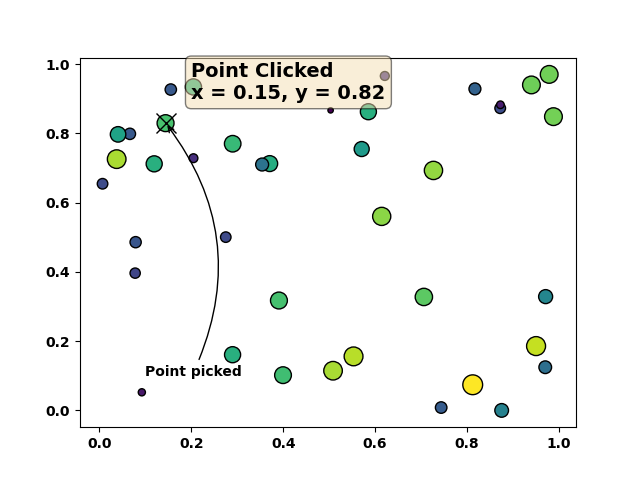

10

In [7]:
x = np.random.random(40)
y = np.random.random(40)
s = 10+200*np.random.random(40)

fig, ax = subplots()
points = ax.scatter(x,y,s=s,edgecolor='k',c=s, cmap=cm.viridis,pickradius=5)

#allow the points to be picked, i.e. selected
points.set_picker(True)

#a box that will contain the information when a point is clicked
props = dict(boxstyle='round', edgecolor = 'k',facecolor='wheat', alpha=0.5)
text_box = ax.text(x = 0.2,y = 0.9, s='',fontsize=14,bbox=props)

#this is a blank plot to be updated when a point is picked
point_picked, = ax.plot([],[],color='k',ms=15,marker='x')

#an annotation to signal that a point was picked
x_pos = 0.1
y_pos = 0.1
annotation = ax.annotate('', xy = [x_pos,y_pos],
                xytext = [x_pos,y_pos],
               arrowprops=dict(arrowstyle='->',connectionstyle="arc3,rad=0.3",facecolor='black',))

def on_click(event):
    """
    This function update the text box when a point in the graph is clicked
    """
    string = 'x = '+str(np.round(event.xdata,2)) + ', y = ' + str(np.round(event.ydata,2))
    text_box.set_text('Point Clicked\n' + string)
    fig.canvas.draw()

def on_pick(event):
    """
    This function update the text box when a point in the scatter plot is picked
    """
    index = event.ind
    point_picked.set_data(x[index],y[index])
    annotation.set_text('Point picked')
    annotation.xy = (x[index],y[index])
    fig.canvas.draw()

fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('pick_event', on_pick)

<IPython.core.display.Javascript object>


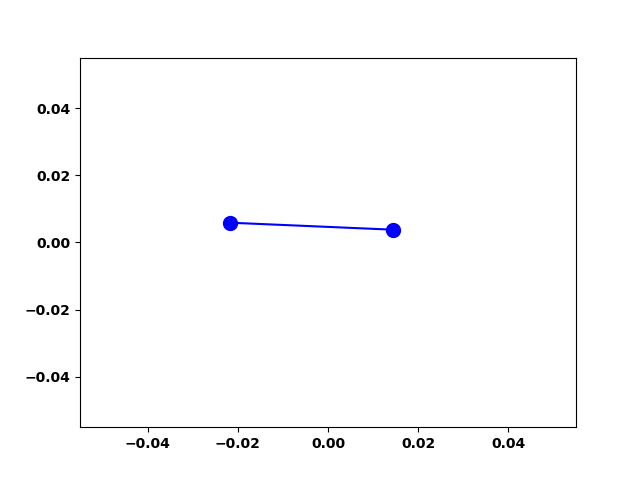

10

In [8]:
# this example will create an empty plot that can be updated
# right click will update a red plot, left click a blue one
# clear when press c

fig, ax = subplots()
red_plot_x = []
red_plot_y = []
red_plot, = ax.plot(red_plot_x,red_plot_y,color='r',ls='-',marker='x',ms=10)

blue_plot_x = []
blue_plot_y = []
blue_plot, = ax.plot(blue_plot_x,blue_plot_y,color='b',ls='-',marker='o',ms=10)

def right_click(event):
    red_plot_x.append(event.xdata)
    red_plot_y.append(event.ydata)
    red_plot.set_data(red_plot_x,red_plot_y)
    
def left_click(event):
    blue_plot_x.append(event.xdata)
    blue_plot_y.append(event.ydata)
    blue_plot.set_data(blue_plot_x,blue_plot_y)
    
def clear(event):
   
    if event.key == 'c':
        
        red_plot_x.clear()
        red_plot_y.clear()
        red_plot.set_data(red_plot_x,red_plot_y)

        blue_plot_x.clear()
        blue_plot_y.clear()
        blue_plot.set_data(blue_plot_x,blue_plot_y)

def on_click(event):
    if event.button == MouseButton.LEFT:
        left_click(event)
    elif event.button == MouseButton.RIGHT:
        right_click(event)
    else:
        pass
        
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('key_press_event', clear)

<IPython.core.display.Javascript object>


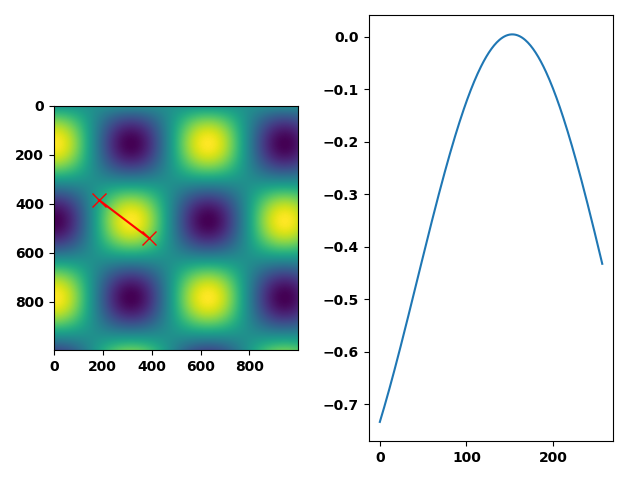

In [11]:
# this example will create an imshow plot
#with right click the user will create a line selecting two points
#and the intensity profile along that line will be plotted in an additional axis

x = np.arange(0,10,0.01)
y = np.arange(0,10,0.01)
xx,yy = np.meshgrid(x,y)
z = np.cos(xx)*np.sin(yy)

fig, axs = subplots(1,2)
ax = axs[0]
ax1 = axs[1]
red_plot_x = []
red_plot_y = []
red_plot, = ax.plot(red_plot_x,red_plot_y,color='r',ls='-',marker='x',ms=10)
im = ax.imshow(z,cmap=cm.viridis)

profile_l, = ax1.plot([],[],ls='-')

def plot_profile_line(xdata, ydata):
    """
    Plots the intensity profile using skimage.measure.profile_line
    """
    u = measure.profile_line(z, [xdata[0],ydata[0]], [xdata[1],ydata[1]], linewidth=1)
    profile_l.set_data(np.arange(0,len(u)),u)
    ax1.relim()
    ax1.autoscale_view()

def right_click(event):
    if event.inaxes==red_plot.axes: #warrants that we are clicking the correct axes
        if len(red_plot_x) < 2:
            #if below 2, append and plot intensity profile only if 2 after appending
            red_plot_x.append(event.xdata)
            red_plot_y.append(event.ydata)
            red_plot.set_data(red_plot_x,red_plot_y)
            if len(red_plot_x) == 2:
                plot_profile_line(red_plot_x,red_plot_y)
            
        elif len(red_plot_x)==2:
            #if it is 2, pop the first and append
            red_plot_x.pop(0)
            red_plot_y.pop(0)
            red_plot_x.append(event.xdata)
            red_plot_y.append(event.ydata)
            red_plot.set_data(red_plot_x,red_plot_y)
            plot_profile_line(red_plot_x,red_plot_y)
            

def on_click(event):
    if event.button == MouseButton.RIGHT:
        right_click(event)
        
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('key_press_event', clear)
fig.tight_layout()

# 2. Simple interaction with a legend

<IPython.core.display.Javascript object>


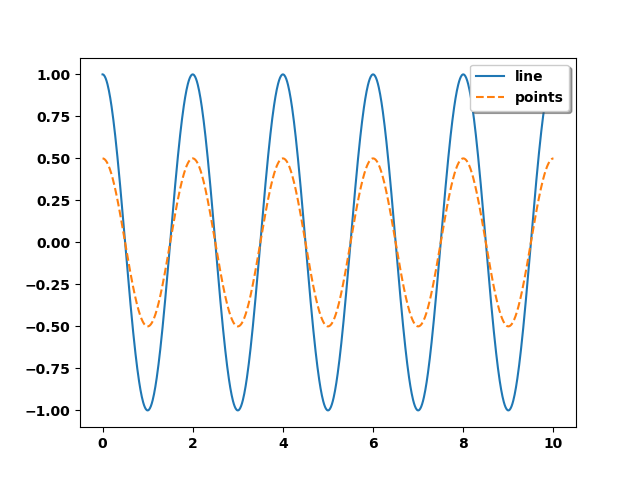

9

In [14]:
x = np.linspace(0,10,1000)
y = np.cos(np.pi*x)
y1 = 0.5*np.cos(np.pi*x)

fig, ax = subplots()
line, = ax.plot(x,y,ls='-',label='line')
points, = ax.plot(x,y1,ls='--',label='points')

leg = ax.legend(fancybox=True, shadow=True,)

plotted = [line,points]
plotted_things = {}  # Will map legend to original plots
for legline, origline in zip(leg.get_lines(), plotted):
    legline.set_picker(True)  # Enable picking on the legend line.
    plotted_things[legline] = origline

def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    origline = plotted_things[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)

In [13]:
plotted_things

{<matplotlib.lines.Line2D at 0x254aff89668>: <matplotlib.lines.Line2D at 0x254aff98d30>,
 <matplotlib.lines.Line2D at 0x254aff89ac8>: <matplotlib.lines.Line2D at 0x254aff98cc0>}